In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class LinearRegressor():
    def __init__(self, learning_rate=1e-3, threshold=1e-6, copy=True):
        self.learning_rate = learning_rate
        self.weights = []
        self.copy = copy
        self.threshold = threshold
        self.loss = {}
        
    def MSE(self, features: np.ndarray, y_true: np.ndarray) -> np.float32:
        
        y_pred = features @ self.weights
        return ((y_pred - y_true)**2).mean()
                
            
    def fit(self,X,y):
        
        if type(X) != np.ndarray:
            X = X.values
        if type(y) != np.ndarray:
            y = y.values
            
        #добавляем свободный коэффициент 
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        
        #инициализируем вектор весов из нулей
        self.weights = np.zeros(X.shape[1])
        
        self.loss[0] = self.MSE(X,y)
        #обновляем веса 
        for i in range(len(self.weights)):
                
            vector_of_2 = np.full((1, X.shape[0]), 2)
            vector_of_i_feature = X[:,i]
            vector_diff_pred_true = (X @ self.weights) - y
                
            diff = (vector_of_2 * vector_of_i_feature * vector_diff_pred_true).mean()

            self.weights[i] = self.weights[i] - (self.learning_rate * diff)
            
        self.loss[1] = self.MSE(X,y)
        
        num_iter = 1
        
        while abs(self.loss[num_iter] - self.loss[num_iter - 1]) > self.threshold:
            
            #обновляем веса 
            for i in range(len(self.weights)):
                
                vector_of_2 = np.full((1, X.shape[0]), 2)
                vector_of_i_feature = X[:,i]
                vector_diff_pred_true = (X @ self.weights) - y
                
                diff = (vector_of_2 * vector_of_i_feature * vector_diff_pred_true).mean()

                self.weights[i] = self.weights[i] - (self.learning_rate * diff)
            
            num_iter += 1
            
            self.loss[num_iter] = self.MSE(X, y)



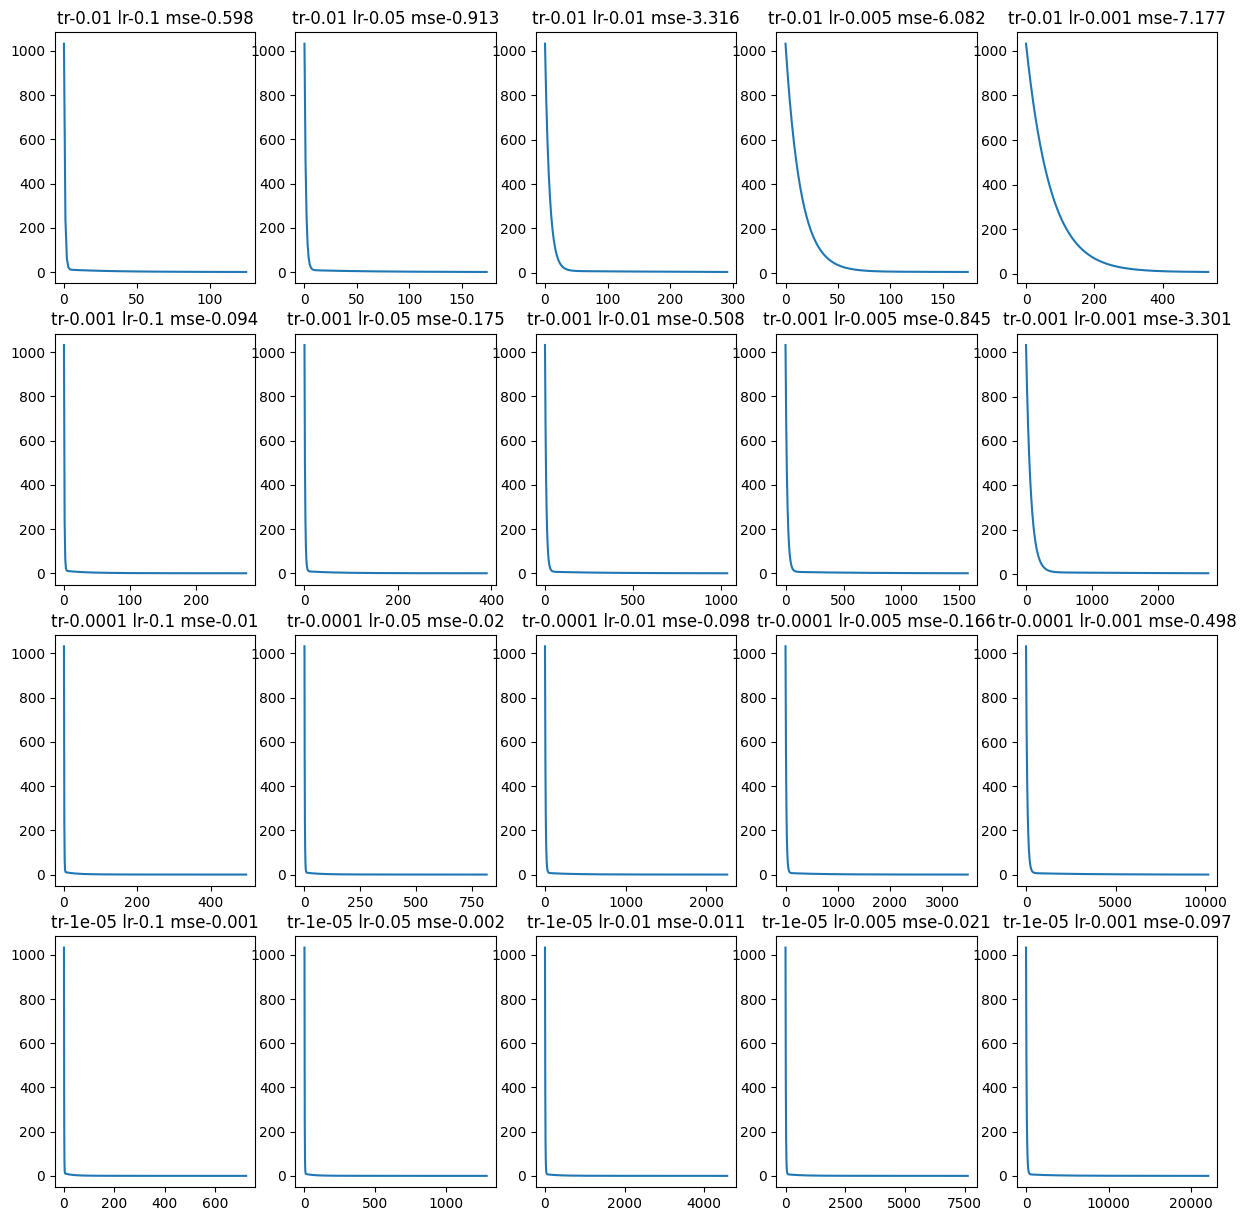

In [10]:
data = pd.read_csv('../karpov_cources/datasets/data_4hw_5.csv')


X = data.drop('target', axis=1).values
y = data['target'].values


thresholds = [1e-2, 1e-3, 1e-4, 1e-5]
learning_rates = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]

fig = plt.figure()

fig.set_size_inches(15,15)
fig.tight_layout()

num_plot = 1 
for threshold in thresholds:
    for learning_rate in learning_rates:
        model = LinearRegressor(learning_rate=learning_rate, threshold=threshold)
        
        model.fit(X,y)
        
        xs = list(model.loss.keys())
        ys = list(model.loss.values())
        
        fig.add_subplot(4,5,num_plot)
        num_plot += 1
        
        plt.plot(xs,ys)
        plt.title(f'tr-{threshold} lr-{learning_rate} mse-{round(ys[-1],3)}')
        
plt.show()

In [ ]:
class LinearRegressor_1():
    def __init__(self, learning_rate=0.01, batch_size=0.01, threshold = 1e-6):
        self.learning_rate = learning_rate
        self.weights = []
        self.threshold = threshold
        self.batch_size = batch_size
        
    def MSE(self,weights: np.ndarray, features: np.ndarray, y_true: np.ndarray) -> np.float32:
        
        res = (((features @ weights) - y_true)**2).mean()
        
        return res
                
    def fit(X,y):
        #инициализируем вектор весов из нулей
        self.weights = np.zeros(X.shape[1])
        batch_size = int(self.batch_size * X.shape[0])
        dx = 10*-8
        
        mse_past = 300
        mse_curr = 0
        
        while abs(mse_curr - mse_past) > 10**-3:
            mse_past = self.MSE(self.weights, batch, y_true) 
            
            rand_ind = np.random.randint(0, X.shape[0] - batch_size, 1)[0]
            batch = X[rand_ind:rand_ind+batch_size]
            y_true = y[rand_ind:rand_ind+batch_size]
            #обновляем веса 
            for i in range(len(self.weights)):
                weihts_with_dx = self.weights.copy()
                weihts_with_dx[i] += dx
                
                diff = (self.MSE(weihts_with_dx, batch, y_true) - self.MSE(self.weights,batch, y_true) )/dx
                self.weights[i] = self.weights[i] - self.learning_rate * diff

            mse_curr = self.MSE(self.weights,batch, y_true)
            

In [ ]:

class LinearClassifier():
    def __init__(self, learning_rate, batch_size=0.01):
        self.learning_rate = learning_rate
        self.weights = []
        self.batch_size = batch_size
        
    classes = np.unique(y)
    
    def softmax(v):
        sum_prob = sum([np.exp(vi) for vi in v])
        
        return np.array([np.exp(vi)/sum_prob for vi in v])
    
    def neg_log_likelihood(w,b,alpha):
        size_batch = X.shape[0] * self.batch_size
        rand_ind = np.random.randint(X.shape[0] - size_batch, size=1)[0]
        
        batch = X[rand_ind:rand_ind+size_batch]
        y_for_batch = y[rand_ind:rand_ind+size_batch]
        sum_on_batch = 0
        
        for i, s in enumerate(batch):
            sum_p_of_cls = sum([np.exp(w @ s + b) for each in classes])
            
            regul = alpha \
                       * (np.linalg.norm(w)**2) \
                       + (np.linalg.norm(b)**2)
            
            sum_on_batch -= np.log((np.exp(w @ s + b)  \
                                    * y_for_batch[i])  \
                                        / sum_p_of_cls)\
                            + regul
        
        
    def fit(X,y):
        X = X.reshape(X.shape[0], -1)[:]
        self.weights = [np.zeros(X.shape[1]) for i in classes]
        
        
         for ind, cl in enumerate(classes):
                while #значение функции ошибки не перестанет менятся 
                    for i, wgt in enumerate(self.weights[ind]):
                        self.weights[ind][i] = wgt - (self.learning_rate * np.gradient() )
                    
             
            
            
            

In [8]:

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([1,2,3,4], dtype=np.float32)

w = 0.0

def forward(x):
    return w * x

def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()

def grad(x,y,y_predicted):
    return np.dot(2 * x, y_predicted - y).mean()

n_iters = 10

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y,y_pred)
    
    dw = grad(X,y,y_pred)
    
    w -= 0.01 * dw
    
    print(round(l,2))


7.5
1.2
0.19
0.03
0.0
0.0
0.0
0.0
0.0
0.0
